# **APRENDIZAGEM SUPERVISIONADA: REGRESSÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever perfis de poços. 

Os dados foram extraídos de um poço em um intervalo com fácies siliciclásticas.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cursos/Machine Learning com Python/siliciclastico2.csv',
                    sep=',', encoding='iso-8859-1')

In [ ]:
poco = ['poco_1']*len(df)
df["POCO"] = poco

In [ ]:
df.head()

,PROF,GR,RHOB,DTCO,DTS,VEL,VS,IMP,VCL,POR,FACIES,POCO
0,5049.7740,108.32,2.60,77.17,149.25,3949.55,2042.17,10274.55,0.96,0.00,3,poco_1
1,5049.9264,95.08,2.62,76.87,145.45,3964.89,2095.61,10397.66,0.80,0.00,2,poco_1
2,5050.0788,86.17,2.63,80.65,150.24,3779.51,2028.72,9936.66,0.59,0.00,2,poco_1
3,5050.2312,79.82,2.57,85.17,155.70,3578.59,1957.65,9191.36,0.52,0.01,2,poco_1
4,5050.3836,84.64,2.57,86.95,161.12,3505.52,1891.81,9007.81,0.59,0.01,2,poco_1


In [ ]:
df.shape

(1184, 12)

### Códigos das Legendas
fac_dict={1: 'Arenito', 2:'Laminado', 3:'Folhelho', 4:'Conglomerado'}

cor_dict={1:'yellow',2:'brown',3:'green',4:'orange'}  

In [ ]:
df['FACIES'].value_counts()

3    564
2    279
1    215
4    126
Name: FACIES, dtype: int64

In [ ]:
#df = df[['PROF','GR', 'RHOB', 'DTCO','DTS', 'VEL', 'VS', 'IMP', 'VCL', 'POR', 'FACIES']]
# Para ordenar um DataFrame

In [ ]:
#df.to_csv('siliciclastico2.csv', sep=',', encoding='utf-8', index = False)
#Para salvar o arquivo

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

Valores Missing (NAN)

In [ ]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

PROF      0
GR        0
RHOB      0
DTCO      0
DTS       0
VEL       0
VS        0
IMP       0
VCL       0
POR       0
FACIES    0
POCO      0
dtype: int64

**Análise dos tipos de atributos.**

In [ ]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

PROF      float64
GR        float64
RHOB      float64
DTCO      float64
DTS       float64
VEL       float64
VS        float64
IMP       float64
VCL       float64
POR       float64
FACIES      int64
POCO       object
dtype: object

**Dados Estatísticos**

In [ ]:
df.describe()

,PROF,GR,RHOB,DTCO,DTS,VEL,VS,IMP,VCL,POR,FACIES
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,5139.918600,81.200659,2.475220,86.024375,154.687348,3575.817128,2004.510524,8860.360946,0.605101,0.067052,2.507601
std,52.110996,30.005125,0.138425,7.698978,19.355934,375.933262,279.169371,1142.884685,0.396977,0.090157,0.909205
min,5049.774000,17.550000,2.110000,46.610000,88.830000,2300.660000,1520.770000,5297.780000,0.000000,0.000000,1.000000
25%,5094.846300,55.750000,2.410000,82.850000,143.655000,3365.262500,1811.372500,8259.382500,0.120000,0.000000,2.000000
50%,5139.918600,95.310000,2.540000,86.460000,153.370000,3525.460000,1987.335000,8800.455000,0.790000,0.010000,3.000000
75%,5184.990900,105.757500,2.570000,90.572500,168.272500,3678.937500,2121.785000,9274.212500,0.960000,0.130000,3.000000
max,5230.063200,124.520000,2.900000,132.480000,200.420000,6539.920000,3431.230000,17235.130000,1.000000,0.290000,4.000000


**Análise dos outliers**

In [ ]:
import plotly.express as px

In [ ]:
boxplot = px.box(df, y="VEL")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="GR")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="RHOB")
boxplot.show()

## **CORRELAÇÃO LINEAR**

In [ ]:
df.head(2)

,PROF,GR,RHOB,DTCO,DTS,VEL,VS,IMP,VCL,POR,FACIES,POCO
0,5049.7740,108.32,2.60,77.17,149.25,3949.55,2042.17,10274.55,0.96,0.0,3,poco_1
1,5049.9264,95.08,2.62,76.87,145.45,3964.89,2095.61,10397.66,0.80,0.0,2,poco_1


**Atributos**

GR: perfil de raios gama.

DTCO: perfil sônico compressional.

DTS: perfil sônico cisalhante.

RHOB: perfil de densidade.

É preciso analisar a correlação aos pares com relação a variável alvo.

In [ ]:
import matplotlib.pyplot as plt

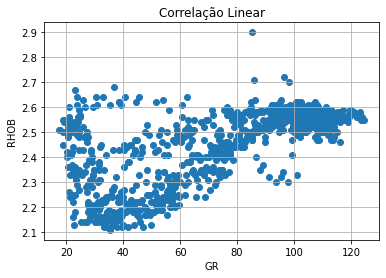

In [ ]:
plt.scatter(df.GR, df.RHOB)
plt.title('Correlação Linear')
plt.xlabel('GR')
plt.ylabel('RHOB')
plt.grid(True)

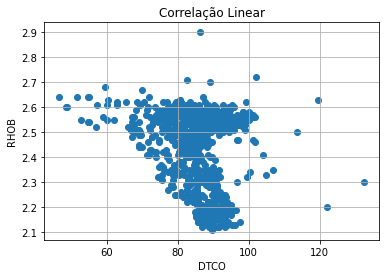

In [ ]:
plt.scatter(df.DTCO, df.RHOB)
plt.title('Correlação Linear')
plt.xlabel('DTCO')
plt.ylabel('RHOB')
plt.grid(True)


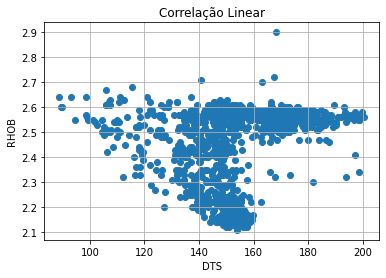

In [ ]:
plt.scatter(df.DTS, df.RHOB)
plt.title('Correlação Linear')
plt.xlabel('DTS')
plt.ylabel('RHOB')
plt.grid(True)

In [ ]:
import seaborn as sns

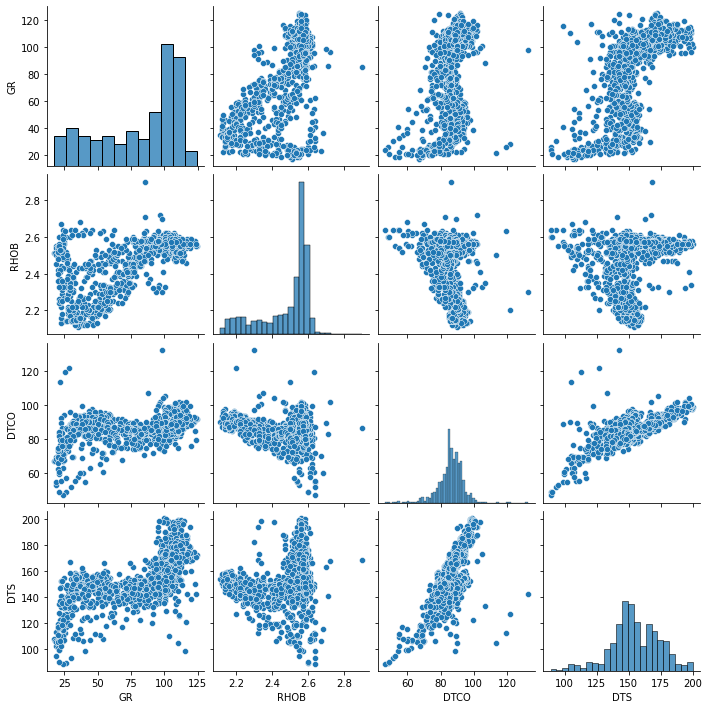

In [ ]:
sns.pairplot(df, vars= ['GR', 'RHOB', 'DTCO','DTS']);

In [ ]:
cor_dict={1:'yellow',2:'brown',3:'green',4:'orange'}

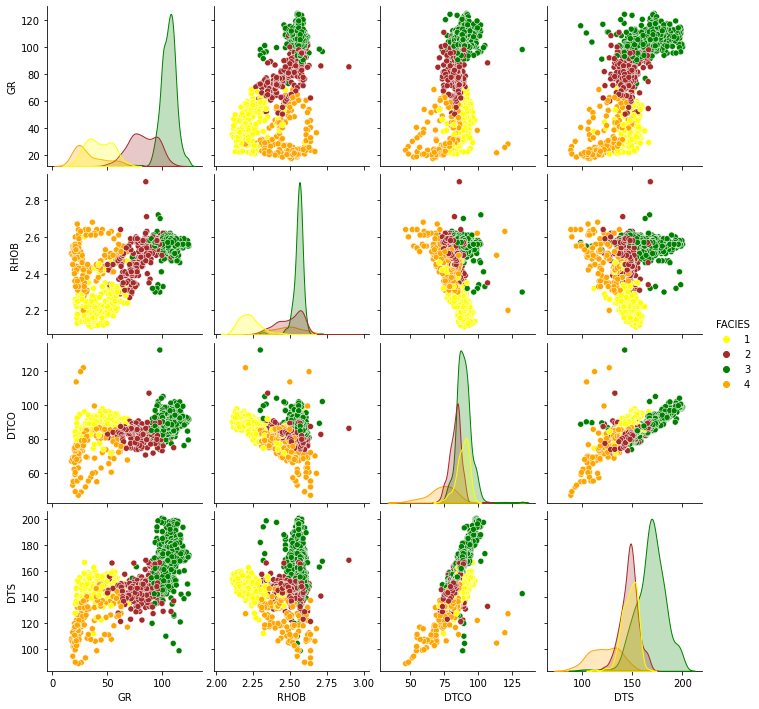

In [ ]:
sns.pairplot(df, vars= ['GR', 'RHOB', 'DTCO','DTS'], hue="FACIES", palette=cor_dict);

### Análise da Normalidade

Gráfico QQ-Plot

In [ ]:
import scipy.stats as stats

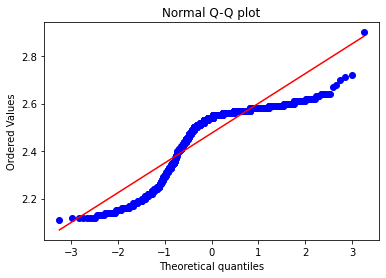

In [ ]:
stats.probplot(df['RHOB'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
hist =  px.histogram (df,  x = "RHOB", nbins=60) 
hist.update_layout(width=800,height=500,title_text='RHOB') 
hist.show()

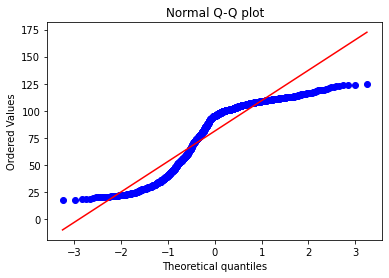

In [ ]:
stats.probplot(df['GR'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df,  x = "GR", nbins=40) 
hist.update_layout(width=800,height=500,title_text='GR') 
hist.show()

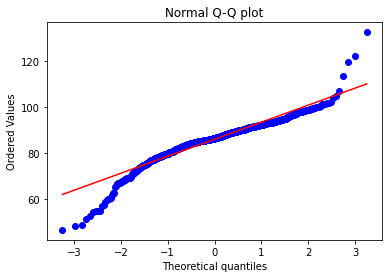

In [ ]:
stats.probplot(df['DTCO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df,  x = "DTCO", nbins=60) 
hist.update_layout(width=800,height=500,title_text='DTCO') 
hist.show()

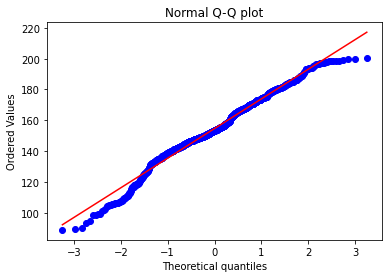

In [ ]:
stats.probplot(df['DTS'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df,  x = "DTS", nbins=60) 
hist.update_layout(width=800,height=500,title_text='DTS') 
hist.show()

Teste Shapiro-Wilk

Limitado até 5 mil registros

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
stats.shapiro(df.RHOB)

ShapiroResult(statistic=0.8184056878089905, pvalue=1.4758433741563295e-34)

In [ ]:
estatistica, p = stats.shapiro(df.RHOB)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.8184056878089905
p-valor: 1.4758433741563295e-34


In [ ]:
estatistica, p = stats.shapiro(df.GR)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.8746600151062012
p-valor: 8.254486841078699e-30


In [ ]:
estatistica, p = stats.shapiro(df.DTCO)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9229225516319275
p-valor: 3.844953805979714e-24


In [ ]:
estatistica, p = stats.shapiro(df.DTS)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9846765398979187
p-valor: 7.719365147096369e-10


Teste Lilliefors (Kolmogorov_Sminorv)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.RHOB, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.2233483197225959
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.DTS, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.0486186338541634
p-valor: 0.0009999999999998899


### Correlação Linear

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

**Como os dados não possuem uma distribuição normal, temos que utilizar a correlação de Spearman**

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [ ]:
# Pearson
#coef,p = stats.pearsonr(df.RHOB, df.GR)
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

In [ ]:
# Spearman
coef,p = stats.spearmanr(df.RHOB, df.GR)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.5919633699683182
p-valor: 7.214578689424597e-113


In [ ]:
# Kendall
#coef,p = stats.kendalltau(df.RHOB, df.GR)
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

In [ ]:
df2 = df.filter(['GR', 'RHOB', 'DTCO', 'DTS'], axis=1)

In [ ]:
df2

,GR,RHOB,DTCO,DTS
0,108.32,2.60,77.17,149.25
1,95.08,2.62,76.87,145.45
2,86.17,2.63,80.65,150.24
3,79.82,2.57,85.17,155.70
4,84.64,2.57,86.95,161.12
...,...,...,...,...
1179,93.55,2.57,89.14,165.27
1180,93.60,2.57,87.57,161.84
1181,95.33,2.57,84.71,155.36
1182,95.90,2.58,81.87,150.73


In [ ]:
correlacoes = df2.corr(method='spearman')
correlacoes

,GR,RHOB,DTCO,DTS
GR,1.000000,0.591963,0.382917,0.725898
RHOB,0.591963,1.000000,-0.146307,0.296981
DTCO,0.382917,-0.146307,1.000000,0.699886
DTS,0.725898,0.296981,0.699886,1.000000


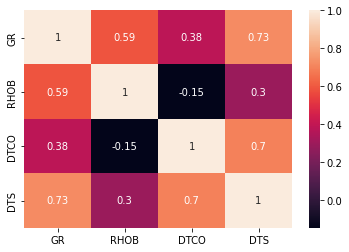

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## **REGRESSÃO LINEAR SIMPLES**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

### Valor médio (MEDV) em função do número de cômodos (RM)

In [ ]:
df.head(2)

,PROF,GR,RHOB,DTCO,DTS,VEL,VS,IMP,VCL,POR,FACIES,POCO
0,5049.7740,108.32,2.60,77.17,149.25,3949.55,2042.17,10274.55,0.96,0.0,3,poco_1
1,5049.9264,95.08,2.62,76.87,145.45,3964.89,2095.61,10397.66,0.80,0.0,2,poco_1


In [ ]:
x1 = df.iloc[:,4:5].values
x1

array([[149.25],
       [145.45],
       [150.24],
       ...,
       [155.36],
       [150.73],
       [147.95]])

In [ ]:
y = df.iloc[:, 1].values
y

array([108.32,  95.08,  86.17, ...,  95.33,  95.9 ,  95.29])

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 10)

In [ ]:
x_treino.shape, y_treino.shape

((828, 1), (828,))

In [ ]:
x_teste.shape, y_teste.shape

((356, 1), (356,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
# Intercepto (coeficiente linear)
reg_linear1.intercept_

-84.5732596765488

In [ ]:
# Coeficiente Angular
reg_linear1.coef_

array([1.0733538])

**Equação: GR = -84,57 + 1,073.DTS**

In [ ]:
# Coeficiente de Determinação dados de treino
reg_linear1.score(x_treino, y_treino)

0.4739058062704913

In [ ]:
# Coeficiente de Determinação dados de teste
reg_linear1.score(x_teste, y_teste)

0.48653205989603465

In [ ]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

In [ ]:
import matplotlib.pyplot as plt

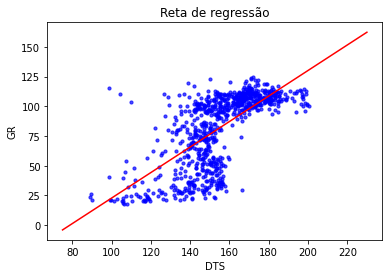

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.7)
X_plot = np.linspace(75, 230)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('GR')
plt.xlabel('DTS')
plt.show()

In [ ]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

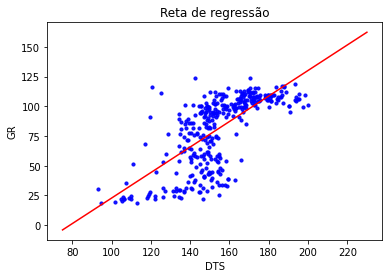

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(75, 230)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('GR')
plt.xlabel('DTS')
plt.show()

In [ ]:
# Fazendo previsões para valores distintos
GR = reg_linear1.predict([[100]])
GR

array([22.76212003])

**Métricas de Desempenho**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

17.041108506969927

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

17.041108506969927

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

455.43823796494246

In [ ]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

21.340998991728164

### GR em função de RHOB

In [ ]:
df.head(2)

,PROF,GR,RHOB,DTCO,DTS,VEL,VS,IMP,VCL,POR,FACIES,POCO
0,5049.7740,108.32,2.60,77.17,149.25,3949.55,2042.17,10274.55,0.96,0.0,3,poco_1
1,5049.9264,95.08,2.62,76.87,145.45,3964.89,2095.61,10397.66,0.80,0.0,2,poco_1


In [ ]:
x2 = df.iloc[:,2:3].values
x2

array([[2.6 ],
       [2.62],
       [2.63],
       ...,
       [2.57],
       [2.58],
       [2.58]])

In [ ]:
y = df.iloc[:, 1].values
y

array([108.32,  95.08,  86.17, ...,  95.33,  95.9 ,  95.29])

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size = 0.3, random_state = 10)

In [ ]:
x_treino.shape, y_treino.shape

((828, 1), (828,))

In [ ]:
x_teste.shape, y_teste.shape

((356, 1), (356,))

In [ ]:
from sklearn.linear_model import LinearRegression
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
# Intercepto (coeficiente linear)
reg_linear2.intercept_

-297.9714849887902

In [ ]:
# Coeficiente Angular
reg_linear2.coef_

array([153.39108095])

**Equação: VGR = -297,97 + 153.RHOB**

In [ ]:
# Coeficiente de Determinação dados de treino
reg_linear2.score(x_treino, y_treino)

0.5105543546177709

In [ ]:
previsoes_treino = reg_linear2.predict(x_treino)
previsoes_treino

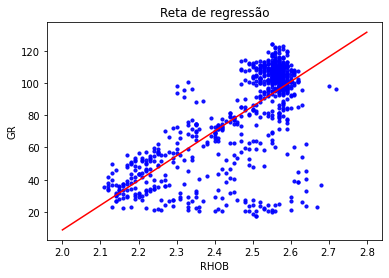

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 2.8)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('GR')
plt.xlabel('RHOB')
plt.show()

In [ ]:
previsoes_teste = reg_linear2.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

In [ ]:
# Coeficiente de Determinação dados de teste
reg_linear2.score(x_teste, y_teste)

0.4809865068859671

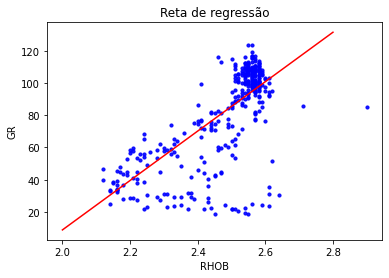

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 2.8)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('GR')
plt.xlabel('RHOB')
plt.show()

In [ ]:
# Fazendo previsões para valores distintos
GR = reg_linear2.predict([[2.5]])
GR

array([85.50621739])

**Métricas de Desempenho**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

14.829090751241244

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

14.829090751241244

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

460.3570589743613

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

21.45593295511433

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv = kfold)
resultado

array([0.16632831, 0.60229831, 0.57022188, 0.43551781, 0.38996326,
       0.56616414, 0.74177701, 0.54183769, 0.4960228 , 0.63514511,
       0.37316546, 0.56540314, 0.4981262 , 0.4515009 , 0.3584649 ])

In [ ]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coef. determinação Médio: 49.28%


###**Plotando os resultados**

In [ ]:
GR_est_dts = reg_linear1.predict(x1)

In [ ]:
GR_est_rhob = reg_linear2.predict(x2)

In [ ]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y, GR_est_rhob))

21.163615619740874

In [ ]:
# Coeficiente de Determinação
reg_linear2.score(x2, y)

0.5020843207772125

In [ ]:
df

,PROF,GR,RHOB,DTCO,DTS,VEL,VS,IMP,VCL,POR,FACIES,POCO
0,5049.7740,108.32,2.60,77.17,149.25,3949.55,2042.17,10274.55,0.96,0.00,3,poco_1
1,5049.9264,95.08,2.62,76.87,145.45,3964.89,2095.61,10397.66,0.80,0.00,2,poco_1
2,5050.0788,86.17,2.63,80.65,150.24,3779.51,2028.72,9936.66,0.59,0.00,2,poco_1
3,5050.2312,79.82,2.57,85.17,155.70,3578.59,1957.65,9191.36,0.52,0.01,2,poco_1
4,5050.3836,84.64,2.57,86.95,161.12,3505.52,1891.81,9007.81,0.59,0.01,2,poco_1
...,...,...,...,...,...,...,...,...,...,...,...,...
1179,5229.4536,93.55,2.57,89.14,165.27,3419.29,1844.28,8790.04,0.78,0.02,2,poco_1
1180,5229.6060,93.60,2.57,87.57,161.84,3480.49,1883.38,8943.75,0.79,0.02,3,poco_1
1181,5229.7584,95.33,2.57,84.71,155.36,3598.10,1961.89,9257.25,0.84,0.01,3,poco_1
1182,5229.9108,95.90,2.58,81.87,150.73,3722.78,2022.15,9596.12,0.84,0.01,2,poco_1


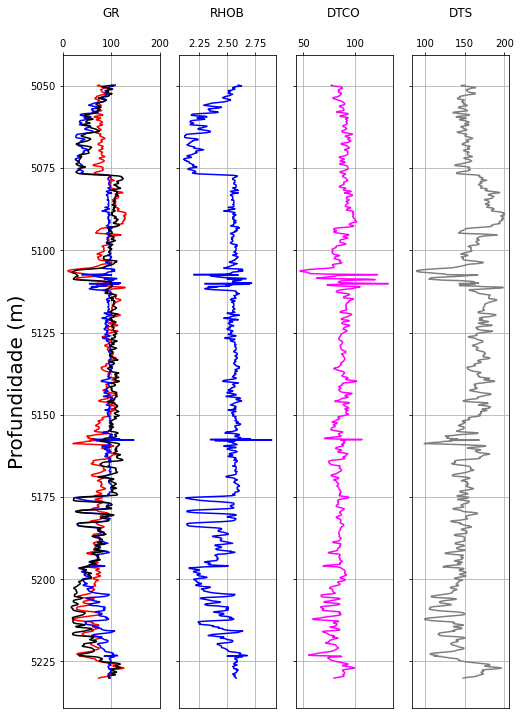

In [ ]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharey=True)

ax0.plot(GR_est_dts, df.PROF, color='red')
ax0.plot(GR_est_rhob, df.PROF, color='blue')
ax0.plot(df.GR, df.PROF, color='black')
ax0.set_ylabel('Profundidade (m)', fontsize=20)
ax0.set_xlim([0, 200])
ax0.set_title('GR', y=1.05)
ax0.grid()
ax0.xaxis.tick_top()

ax1.plot(df.RHOB, df.PROF, color='blue')
#ax1.set_xlabel('GR (API)')
ax1.set_title('RHOB', y=1.05)
ax1.grid()
ax1.xaxis.tick_top()

ax2.plot(df.DTCO, df.PROF, color='magenta')
#ax4.set_xlabel('RHOB (g/cm3)')
ax2.set_title('DTCO', y=1.05)
ax2.grid()
ax2.xaxis.tick_top()

ax3.plot(df.DTS, df.PROF, color='gray')
#ax4.set_xlabel('RHOB (g/cm3)')
ax3.set_title('DTS', y=1.05)
ax3.grid()
ax3.xaxis.tick_top()


plt.gca().invert_yaxis()
f.set_size_inches(8, 12)
plt.savefig("Perfis_Estimados.png")

## **REGRESSÃO LINEAR MÚLTIPLA**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df.head(2)

,PROF,GR,RHOB,DTCO,DTS,VEL,VS,IMP,VCL,POR,FACIES,POCO
0,5049.7740,108.32,2.60,77.17,149.25,3949.55,2042.17,10274.55,0.96,0.0,3,poco_1
1,5049.9264,95.08,2.62,76.87,145.45,3964.89,2095.61,10397.66,0.80,0.0,2,poco_1


In [ ]:
independente = df.iloc[:, 2:5].values
independente

array([[  2.6 ,  77.17, 149.25],
       [  2.62,  76.87, 145.45],
       [  2.63,  80.65, 150.24],
       ...,
       [  2.57,  84.71, 155.36],
       [  2.58,  81.87, 150.73],
       [  2.58,  79.67, 147.95]])

In [ ]:
independente.shape

(1184, 3)

In [ ]:
dependente = df.iloc[:, 1].values
dependente

array([108.32,  95.08,  86.17, ...,  95.33,  95.9 ,  95.29])

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((828, 3), (356, 3))

In [ ]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
multipla.intercept_

-423.8525557002204

In [ ]:
multipla.coef_

array([141.48746038,   0.77860819,   0.56782019])

In [ ]:
print("Equação: GR = {:.2f} + ({:.2f})*RHOB + ({:.2f})*DTCO + ({:.2f})*DTS".format(multipla.intercept_, multipla.coef_[0], multipla.coef_[1], multipla.coef_[2]))

Equação: GR = -423.85 + (141.49)*RHOB + (0.78)*DTCO + (0.57)*DTS


In [ ]:
# Coeficiente de Determinação
multipla.score(x_treino, y_treino)

0.798327660143533

**TESTE**

In [ ]:
previsoes = multipla.predict(x_teste)
previsoes

In [ ]:
y_teste

In [ ]:
# Coeficiente de Determinação
multipla.score(x_teste, y_teste)

0.8187101308460824

In [ ]:
# Fazendo previsões para valores distintos
GR_ = multipla.predict([[2.2,77,140]])
GR_

array([26.86751503])

**MÉTRICAS**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes).mean()

10.175953317806359

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes)

10.175953317806359

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes)

169.58862235330952

In [ ]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes))

13.022619642503175

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.60174748, 0.83615662, 0.78690876, 0.84285367, 0.66862766,
       0.76847829, 0.81467599, 0.81561717, 0.83830122, 0.79626587,
       0.86074614, 0.8303872 , 0.85958496, 0.83687406, 0.766732  ])

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 79.49%


### **PLOTANDO OS RESULTADOS**

In [ ]:
multipla2 = LinearRegression()
multipla2.fit(independente, dependente)

LinearRegression()

In [ ]:
print("Equação: GR = {:.2f} + ({:.2f})*RHOB + ({:.2f})*DTCO + ({:.2f})*DTS".format(multipla2.intercept_, multipla2.coef_[0], multipla2.coef_[1], multipla2.coef_[2]))

Equação: GR = -435.32 + (142.53)*RHOB + (0.88)*DTCO + (0.57)*DTS


In [ ]:
GR_RM = multipla2.predict(independente)
GR_RM.shape

(1184,)

In [ ]:
GR_RM

array([88.11654866, 88.53548288, 96.00975249, ..., 93.94078851,
       90.23291631, 86.71682438])

In [ ]:
abs(dependente - GR_RM).mean()

9.997612543741202

In [ ]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(dependente, GR_RM))

13.23021235114793

In [ ]:
# Coeficiente de Determinação
multipla2.score(independente, dependente)

0.8054148462891626

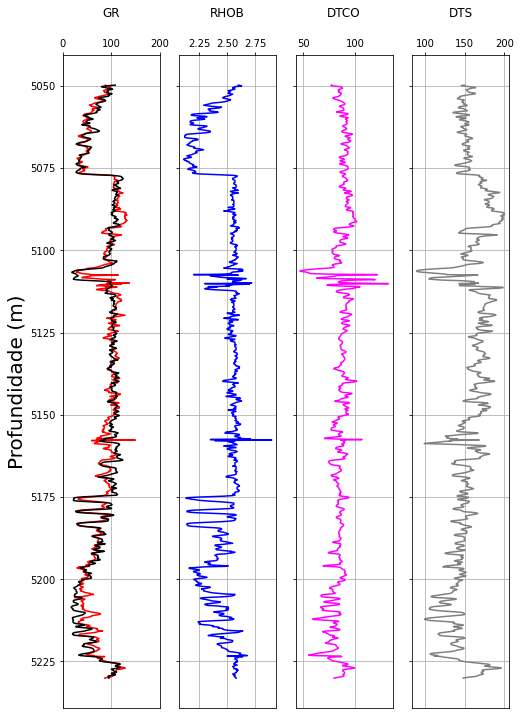

In [ ]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharey=True)

ax0.plot(GR_RM, df.PROF, color='red')
#ax0.plot(GR_est_rhob, df.PROF, color='blue')
ax0.plot(df.GR, df.PROF, color='black')
ax0.set_ylabel('Profundidade (m)', fontsize=20)
ax0.set_xlim([0, 200])
ax0.set_title('GR', y=1.05)
ax0.grid()
ax0.xaxis.tick_top()

ax1.plot(df.RHOB, df.PROF, color='blue')
#ax1.set_xlabel('GR (API)')
ax1.set_title('RHOB', y=1.05)
ax1.grid()
ax1.xaxis.tick_top()

ax2.plot(df.DTCO, df.PROF, color='magenta')
#ax4.set_xlabel('RHOB (g/cm3)')
ax2.set_title('DTCO', y=1.05)
ax2.grid()
ax2.xaxis.tick_top()

ax3.plot(df.DTS, df.PROF, color='gray')
#ax4.set_xlabel('RHOB (g/cm3)')
ax3.set_title('DTS', y=1.05)
ax3.grid()
ax3.xaxis.tick_top()


plt.gca().invert_yaxis()
f.set_size_inches(8, 12)
plt.savefig("Perfis_Estimados.png")

**REGRESSÃO LINEAR SIMPLES (RHOB):** R^2 = 0,50; RMSE = 21,16; R^2 Validação Cruzada: 49,28%

**REGRESSÃO LINEAR MÚLTIPLA (RHOB, DTCO, DTS):** R^2 = 0,81; RMSE = 13,23; R^2 Validação Cruzada: 79,49%

## **REGRESSÃO POLINOMIAL**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html 

In [ ]:
df.head(2)

,PROF,GR,RHOB,DTCO,DTS,VEL,VS,IMP,VCL,POR,FACIES,POCO
0,5049.7740,108.32,2.60,77.17,149.25,3949.55,2042.17,10274.55,0.96,0.0,3,poco_1
1,5049.9264,95.08,2.62,76.87,145.45,3964.89,2095.61,10397.66,0.80,0.0,2,poco_1


In [ ]:
x1 = df.iloc[:,2:3].values
x1

array([[2.6 ],
       [2.62],
       [2.63],
       ...,
       [2.57],
       [2.58],
       [2.58]])

In [ ]:
y = df.iloc[:, 1].values
y

array([108.32,  95.08,  86.17, ...,  95.33,  95.9 ,  95.29])

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, y_treino.shape

((828, 1), (828,))

In [ ]:
x_teste.shape, y_teste.shape

((356, 1), (356,))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# Pré Processamento
grau_polinomial =PolynomialFeatures(degree=2)

In [ ]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly

array([[1.    , 2.33  , 5.4289],
       [1.    , 2.35  , 5.5225],
       [1.    , 2.55  , 6.5025],
       ...,
       [1.    , 2.56  , 6.5536],
       [1.    , 2.58  , 6.6564],
       [1.    , 2.58  , 6.6564]])

In [ ]:
polinomial = LinearRegression()

In [ ]:
polinomial.fit(x_poly, y_treino)

LinearRegression()

In [ ]:
previsoes_treino = polinomial.predict(x_poly)

In [ ]:
polinomial.coef_

array([ 0.        , 19.52710247, 27.86836286])

In [ ]:
polinomial.intercept_

-137.87907514690653

**Equação:**

GR = -137.88 + 19.53*RHOB + 27.87*RHOB^2

In [ ]:
numeros = np.linspace(2,3,342)
numeros

array([2.        , 2.00293255, 2.0058651 , 2.00879765, 2.01173021,
       2.01466276, 2.01759531, 2.02052786, 2.02346041, 2.02639296,
       2.02932551, 2.03225806, 2.03519062, 2.03812317, 2.04105572,
       2.04398827, 2.04692082, 2.04985337, 2.05278592, 2.05571848,
       2.05865103, 2.06158358, 2.06451613, 2.06744868, 2.07038123,
       2.07331378, 2.07624633, 2.07917889, 2.08211144, 2.08504399,
       2.08797654, 2.09090909, 2.09384164, 2.09677419, 2.09970674,
       2.1026393 , 2.10557185, 2.1085044 , 2.11143695, 2.1143695 ,
       2.11730205, 2.1202346 , 2.12316716, 2.12609971, 2.12903226,
       2.13196481, 2.13489736, 2.13782991, 2.14076246, 2.14369501,
       2.14662757, 2.14956012, 2.15249267, 2.15542522, 2.15835777,
       2.16129032, 2.16422287, 2.16715543, 2.17008798, 2.17302053,
       2.17595308, 2.17888563, 2.18181818, 2.18475073, 2.18768328,
       2.19061584, 2.19354839, 2.19648094, 2.19941349, 2.20234604,
       2.20527859, 2.20821114, 2.2111437 , 2.21407625, 2.21700

In [ ]:
numeros.shape

(342,)

In [ ]:
valor = -137.88 +19.53*numeros + 27.87*numeros**2

In [ ]:
import matplotlib.pyplot as plt

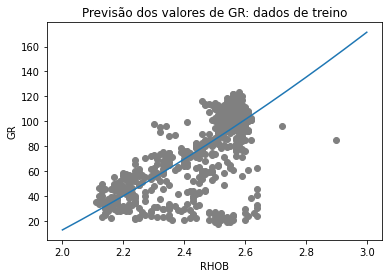

In [ ]:
plt.scatter(x_treino, y_treino, c = "gray")
plt.xlabel("RHOB")
plt.ylabel("GR")
plt.title("Previsão dos valores de GR: dados de treino")
plt.plot(numeros, valor);

In [ ]:
# Fazendo previsões para valores distintos
rhob = 2.30
valor = -137.88 +19.53*rhob + 27.87*rhob**2
valor

54.47129999999997

In [ ]:
# Coeficiente de Determinação dados de treino
polinomial.score(x_poly, y_treino)

0.5261552885635223

**TESTE**

In [ ]:
numeros2 = np.linspace(2,3,147)
numeros2

array([2.        , 2.00684932, 2.01369863, 2.02054795, 2.02739726,
       2.03424658, 2.04109589, 2.04794521, 2.05479452, 2.06164384,
       2.06849315, 2.07534247, 2.08219178, 2.0890411 , 2.09589041,
       2.10273973, 2.10958904, 2.11643836, 2.12328767, 2.13013699,
       2.1369863 , 2.14383562, 2.15068493, 2.15753425, 2.16438356,
       2.17123288, 2.17808219, 2.18493151, 2.19178082, 2.19863014,
       2.20547945, 2.21232877, 2.21917808, 2.2260274 , 2.23287671,
       2.23972603, 2.24657534, 2.25342466, 2.26027397, 2.26712329,
       2.2739726 , 2.28082192, 2.28767123, 2.29452055, 2.30136986,
       2.30821918, 2.31506849, 2.32191781, 2.32876712, 2.33561644,
       2.34246575, 2.34931507, 2.35616438, 2.3630137 , 2.36986301,
       2.37671233, 2.38356164, 2.39041096, 2.39726027, 2.40410959,
       2.4109589 , 2.41780822, 2.42465753, 2.43150685, 2.43835616,
       2.44520548, 2.45205479, 2.45890411, 2.46575342, 2.47260274,
       2.47945205, 2.48630137, 2.49315068, 2.5       , 2.50684

In [ ]:
numeros2.shape

(147,)

In [ ]:
valor2 = -137.88 +19.53*numeros2 + 27.87*numeros2**2

In [ ]:
import matplotlib.pyplot as plt

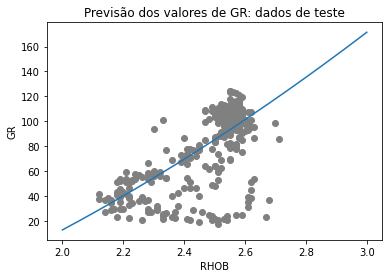

In [ ]:
plt.scatter(x_teste, y_teste, c = "gray")
plt.xlabel("RHOB")
plt.ylabel("GR")
plt.title("Previsão dos valores de GR: dados de teste")
plt.plot(numeros2, valor2);

In [ ]:
x_poly_teste = grau_polinomial.fit_transform(x_teste)
x_poly_teste

array([[1.    , 2.57  , 6.6049],
       [1.    , 2.58  , 6.6564],
       [1.    , 2.3   , 5.29  ],
       ...,
       [1.    , 2.51  , 6.3001],
       [1.    , 2.62  , 6.8644],
       [1.    , 2.58  , 6.6564]])

In [ ]:
polinomial_teste = LinearRegression()

In [ ]:
polinomial_teste.fit(x_poly_teste, y_teste)

LinearRegression()

In [ ]:
# Coeficiente de Determinação dados de teste
polinomial.score(x_poly_teste, y_teste)

0.4497574339411766

In [ ]:
previsoes_teste = polinomial_teste.predict(x_poly_teste)

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

16.372102192464613

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

511.5260519069188

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

22.616941701010745

### **PLOTANDO OS RESULTADOS**

In [ ]:
# Pré Processamento
grau_polinomial =PolynomialFeatures(degree=2)

In [ ]:
RHOB_poly = grau_polinomial.fit_transform(x1)
RHOB_poly

array([[1.    , 2.6   , 6.76  ],
       [1.    , 2.62  , 6.8644],
       [1.    , 2.63  , 6.9169],
       ...,
       [1.    , 2.57  , 6.6049],
       [1.    , 2.58  , 6.6564],
       [1.    , 2.58  , 6.6564]])

In [ ]:
polinomial = LinearRegression()

In [ ]:
polinomial.fit(RHOB_poly, y)

LinearRegression()

In [ ]:
previsoes_GR = polinomial.predict(RHOB_poly)

In [ ]:
polinomial.coef_

array([ 0.        , 19.44712458, 27.98479547])

In [ ]:
polinomial.intercept_

-138.92580357481484

Equação:

GR = -138.92 + 19.44RHOB + 27.98RHOB^2

In [ ]:
# Coeficiente de Determinação dados de treino
polinomial.score(RHOB_poly, y)

0.5026272728666015

In [ ]:
previsoes_GR.shape

(1184,)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y, previsoes_GR))

21.15207354138119

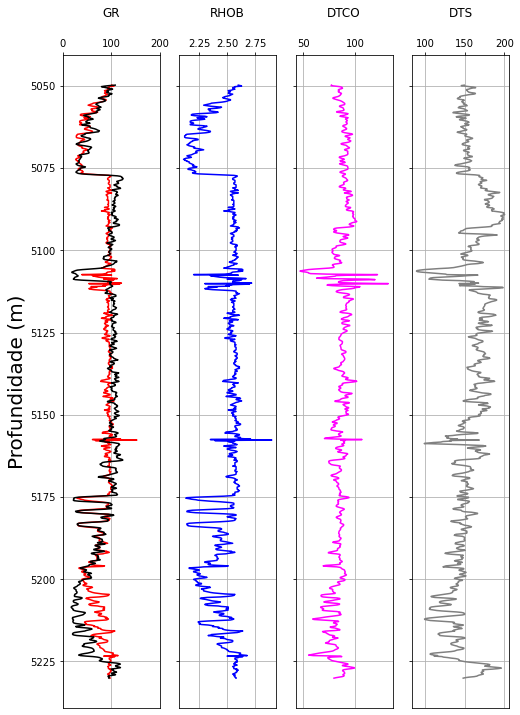

In [ ]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharey=True)

ax0.plot(previsoes_GR, df.PROF, color='red')
#ax0.plot(GR_est_rhob, df.PROF, color='blue')
ax0.plot(df.GR, df.PROF, color='black')
ax0.set_ylabel('Profundidade (m)', fontsize=20)
ax0.set_xlim([0, 200])
ax0.set_title('GR', y=1.05)
ax0.grid()
ax0.xaxis.tick_top()

ax1.plot(df.RHOB, df.PROF, color='blue')
#ax1.set_xlabel('GR (API)')
ax1.set_title('RHOB', y=1.05)
ax1.grid()
ax1.xaxis.tick_top()

ax2.plot(df.DTCO, df.PROF, color='magenta')
#ax4.set_xlabel('RHOB (g/cm3)')
ax2.set_title('DTCO', y=1.05)
ax2.grid()
ax2.xaxis.tick_top()

ax3.plot(df.DTS, df.PROF, color='gray')
#ax4.set_xlabel('RHOB (g/cm3)')
ax3.set_title('DTS', y=1.05)
ax3.grid()
ax3.xaxis.tick_top()


plt.gca().invert_yaxis()
f.set_size_inches(8, 12)
plt.savefig("Perfis_Estimados.png")

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES (RHOB):** R^2 = 0,50; RMSE = 21,16; R^2 Validação Cruzada: 49,28%

**REGRESSÃO LINEAR MÚLTIPLA (RHOB, DTCO, DTS):** R^2 = 0,81; RMSE = 13,23; R^2 Validação Cruzada: 79,49%*

**REGRESSÃO POLINOMIAL (RHOB):** R^2 = 0,50; RMSE = 21,15;

## **REGRESSÃO POR VETORES DE SUPORTE**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html 

In [ ]:
df.head(2)

,PROF,GR,RHOB,DTCO,DTS,VEL,VS,IMP,VCL,POR,FACIES,POCO
0,5049.7740,108.32,2.60,77.17,149.25,3949.55,2042.17,10274.55,0.96,0.0,3,poco_1
1,5049.9264,95.08,2.62,76.87,145.45,3964.89,2095.61,10397.66,0.80,0.0,2,poco_1


In [ ]:
independente = df.iloc[:, 2:5].values
independente

array([[  2.6 ,  77.17, 149.25],
       [  2.62,  76.87, 145.45],
       [  2.63,  80.65, 150.24],
       ...,
       [  2.57,  84.71, 155.36],
       [  2.58,  81.87, 150.73],
       [  2.58,  79.67, 147.95]])

In [ ]:
independente.shape

(1184, 3)

In [ ]:
dependente = df.iloc[:, 1].values
dependente

array([108.32,  95.08,  86.17, ...,  95.33,  95.9 ,  95.29])

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((828, 3), (356, 3))

In [ ]:
# kernel = rbf, linear, polinomial (poly)
from sklearn.svm import SVR
SVR = SVR(kernel='linear')
SVR.fit(x_treino,y_treino)

SVR(kernel='linear')

In [ ]:
SVR.score(x_treino, y_treino)

0.6290128048175241

In [ ]:
SVR.score(x_teste, y_teste)

0.7029012255063483

**Padronização de escala**

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [ ]:
x_treino_scaler

array([[-1.01445238, -0.94602135, -1.07100691],
       [-0.87250619, -1.04931332, -1.50597028],
       [ 0.54695569,  0.69244765,  0.99206667],
       ...,
       [ 0.61792879, -0.29140844, -0.29924716],
       [ 0.75987497, -0.07836873,  0.41350795],
       [ 0.75987497, -1.14356725, -0.3284884 ]])

In [ ]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1))

In [ ]:
y_treino_scaler

In [ ]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

array([[ 0.68890188, -0.2152306 , -0.57181725],
       [ 0.75987497, -0.61677817, -0.03503172],
       [-1.22737166, -0.0125201 , -0.43657654],
       ...,
       [ 0.26306332,  0.57753533,  0.8845007 ],
       [ 1.04376735, -3.04930424, -2.52053671],
       [ 0.75987497, -1.24815038, -0.55458581]])

In [ ]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

In [ ]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='rbf')
SVR2.fit(x_treino_scaler, y_treino_scaler.ravel())

# .ravel() é para retornar matriz 1D

SVR()

In [ ]:
SVR2.score(x_treino_scaler, y_treino_scaler)

0.9061148673755729

**TESTE**

In [ ]:
SVR2.score(x_teste_scaler, y_teste_scaler)

0.8974207537382441

In [ ]:
previsoes_teste = SVR2.predict(x_teste_scaler)
previsoes_teste

In [ ]:
y_teste_scaler

**Revertendo a transformação**

In [ ]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_teste.reshape(-1, 1))

In [ ]:
y_teste_inverse

In [ ]:
previsoes_inverse

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste_inverse, previsoes_inverse)

7.086103278110086

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste_inverse, previsoes_inverse)

95.95832981048909

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse))

9.795832267372134

### **Validação Cruzada**

**Padronização de escala**

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
independente_scaler = x.fit_transform(independente)

In [ ]:
independente_scaler

array([[ 0.90181237, -1.15055743, -0.28103246],
       [ 1.04635628, -1.1895401 , -0.47743764],
       [ 1.11862823, -0.69835839, -0.22986374],
       ...,
       [ 0.68499651, -0.17079285,  0.03476641],
       [ 0.75726846, -0.53982884, -0.20453781],
       [ 0.75726846, -0.8257018 , -0.34822371]])

In [ ]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1,1))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.svm import SVR
modelo = SVR(kernel='rbf')
resultado = cross_val_score(modelo, independente_scaler, dependente_scaler.ravel(), cv = kfold)
resultado

array([0.83956591, 0.90275825, 0.88345839, 0.85441806, 0.89976702,
       0.85228751, 0.89120138, 0.87340981, 0.88728705, 0.86685276,
       0.90690924, 0.91500995, 0.92146073, 0.9215406 , 0.86604343])

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação médio: 88.55%


### **PLOTANDO OS RESULTADOS**

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
independente_scaler = x.fit_transform(independente)

In [ ]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1,1))

In [ ]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='rbf')
SVR2.fit(independente_scaler, dependente_scaler.ravel())

SVR()

In [ ]:
SVR2.score(independente_scaler, dependente_scaler)

0.9071594856039561

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(dependente_scaler, previsoes_inverse))

In [ ]:
previsoes_GR_SVR_scaler = SVR2.predict(independente_scaler)
previsoes_GR_SVR_scaler

array([0.56990467, 0.56164479, 0.65863072, ..., 0.6727377 , 0.60532939,
       0.53972514])

Revertendo a transformação

In [ ]:
previsoes_GR_SVR = y_scaler.inverse_transform(previsoes_GR_SVR_scaler)
previsoes_GR_SVR2 = y_scaler.inverse_transform(previsoes_GR_SVR.reshape(-1, 1))

ValueError: ignored

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES (RHOB):** R^2 = 0,50; RMSE = 21,16; R^2 Validação Cruzada: 49,28%

**REGRESSÃO LINEAR MÚLTIPLA (RHOB, DTCO, DTS):** R^2 = 0,81; RMSE = 13,23; R^2 Validação Cruzada: 79,49%*

**REGRESSÃO POLINOMIAL (RHOB):** R^2 = 0,50; RMSE = 21,15;

**REGRESSÃO SVR (RHOB, DTCO, DTS):** R^2 = 0,91; RMSE = 73422,7. R^2 Validação Cruzada: 88,55%.

## **REGRESSÃO COM ÁRVORE DE DECISÃO**

https://scikit-learn.org/stable/modules/tree.html#regression 

In [ ]:
df.head(2)

,PROF,GR,RHOB,DTCO,DTS,VEL,VS,IMP,VCL,POR,FACIES,POCO
0,5049.7740,108.32,2.60,77.17,149.25,3949.55,2042.17,10274.55,0.96,0.0,3,poco_1
1,5049.9264,95.08,2.62,76.87,145.45,3964.89,2095.61,10397.66,0.80,0.0,2,poco_1


In [ ]:
independente = df.iloc[:, 2:5].values
independente

array([[  2.6 ,  77.17, 149.25],
       [  2.62,  76.87, 145.45],
       [  2.63,  80.65, 150.24],
       ...,
       [  2.57,  84.71, 155.36],
       [  2.58,  81.87, 150.73],
       [  2.58,  79.67, 147.95]])

In [ ]:
independente.shape

(1184, 3)

In [ ]:
dependente = df.iloc[:, 1].values
dependente

array([108.32,  95.08,  86.17, ...,  95.33,  95.9 ,  95.29])

In [ ]:
dependente.shape

(1184,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((828, 3), (356, 3))

In [ ]:
y_treino.shape, y_teste.shape

((828,), (356,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=6, random_state=10)
arvore.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=6, random_state=10)

In [ ]:
arvore.score(x_treino, y_treino)

0.9270822929782232

**TESTE**

In [ ]:
arvore.score(x_teste, y_teste)

0.8623158965497089

In [ ]:
previsoes_teste = arvore.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

7.928965987623346

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

128.7973648668764

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

11.348892671396465

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=6, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.91197633, 0.88331105, 0.85615266, 0.7936127 , 0.90504327,
       0.82856162, 0.85691467, 0.87555506, 0.87393829, 0.85773912,
       0.87087343, 0.86598389, 0.91587739, 0.82350708, 0.8092166 ])

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 86.19%


### **PLOTANDO OS RESULTADOS**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=6, random_state=10)
arvore.fit(independente, dependente)

DecisionTreeRegressor(max_depth=6, random_state=10)

In [ ]:
arvore.score(independente, dependente)

0.9266071945293872

In [ ]:
previsoes_GR_tree = arvore.predict(independente)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(dependente, previsoes_GR_tree))

8.125286972745025

In [ ]:
import matplotlib.pyplot as plt

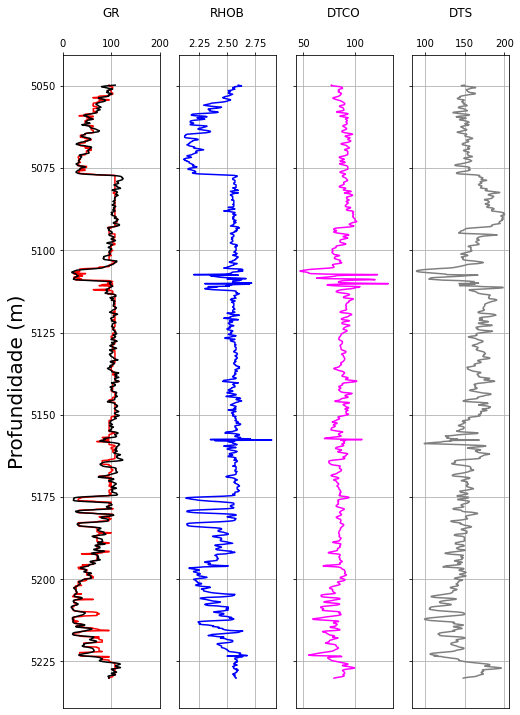

In [ ]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharey=True)

ax0.plot(previsoes_GR_tree, df.PROF, color='red')
#ax0.plot(GR_est_rhob, df.PROF, color='blue')
ax0.plot(df.GR, df.PROF, color='black')
ax0.set_ylabel('Profundidade (m)', fontsize=20)
ax0.set_xlim([0, 200])
ax0.set_title('GR', y=1.05)
ax0.grid()
ax0.xaxis.tick_top()

ax1.plot(df.RHOB, df.PROF, color='blue')
#ax1.set_xlabel('GR (API)')
ax1.set_title('RHOB', y=1.05)
ax1.grid()
ax1.xaxis.tick_top()

ax2.plot(df.DTCO, df.PROF, color='magenta')
#ax4.set_xlabel('RHOB (g/cm3)')
ax2.set_title('DTCO', y=1.05)
ax2.grid()
ax2.xaxis.tick_top()

ax3.plot(df.DTS, df.PROF, color='gray')
#ax4.set_xlabel('RHOB (g/cm3)')
ax3.set_title('DTS', y=1.05)
ax3.grid()
ax3.xaxis.tick_top()


plt.gca().invert_yaxis()
f.set_size_inches(8, 12)
plt.savefig("Perfis_Estimados.png")

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

## **REGRESSÃO COM RANDOM FOREST**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
independente.shape

(489, 3)

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
dependente.shape

(489,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
y_treino.shape, y_teste.shape

((342,), (147,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
random.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=10)

In [ ]:
random.score(x_treino, y_treino)

0.9160346630571496

**TESTE**

In [ ]:
random.score(x_teste, y_teste)

0.8465287311346861

In [ ]:
previsoes_teste = random.predict(x_teste)
previsoes_teste

array([429790.1184383 , 626425.24570752, 319291.        , 369687.79212278,
       504007.08094948, 275038.77411657, 325784.08333333, 419935.2164072 ,
       461145.73252911, 407252.93004329, 250872.39578869, 342808.74084789,
       454388.83705035, 207628.59742739, 523389.0588747 , 343148.06749092,
       436277.53376586, 519168.2986373 , 400302.89135561, 591299.21535976,
       617998.62691853, 737021.36549068, 207628.59742739, 433990.65598718,
       378602.16484354, 911394.60227273, 690510.8130319 , 913862.10227273,
       420589.43787112, 423405.52420844, 326646.08924392, 380183.19387172,
       436732.30908567, 687715.29521126, 434483.34195931, 890163.5       ,
       529306.19369936, 231323.99610428, 491146.52058414, 505014.08035269,
       256106.89211222, 382749.3212387 , 424659.14608592, 488901.56840275,
       401002.16125623, 406066.93224785, 503825.27539393, 325390.61402888,
       856473.33333333, 421515.20723289, 693269.282585  , 434272.60667474,
       558379.53436472, 3

In [ ]:
y_teste

array([ 417900.,  632100.,  281400.,  577500.,  474600.,  359100.,
        247800.,  474600.,  449400.,  411600.,  214200.,  214200.,
        428400.,  375900.,  577500.,  327600.,  420000.,  489300.,
        470400.,  640500.,  651000.,  690900.,  147000.,  441000.,
        367500.,  966000.,  756000.,  888300.,  455700.,  445200.,
        323400.,  455700.,  430500.,  867300.,  445200.,  875700.,
        415800.,  268800.,  590100.,  497700.,  231000.,  315000.,
        388500.,  449400.,  413700.,  352800.,  453600.,  306600.,
        898800.,  514500.,  743400.,  474600.,  600600.,  304500.,
        661500.,  489300.,  422100.,  184800.,  525000.,  249900.,
        407400.,  361200.,  428400.,  392700.,  428400.,  472500.,
        258300.,  550200.,  346500.,  199500.,  302400.,  611100.,
        396900.,  585900.,  279300.,  483000.,  462000.,  218400.,
        518700.,  420000.,  392700.,  980700.,  455700.,  514500.,
        480900.,  520800.,  485100.,  525000.,  390600.,  5691

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

49730.29595322481

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

4452803054.515374

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

66729.326795011

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.9390087 , 0.9048205 , 0.78576987, 0.78178487, 0.80471035,
       0.73189206, 0.88019637, 0.85442545, 0.7796746 , 0.82002933,
       0.93538902, 0.72717569, 0.80683864, 0.8863317 , 0.78974059])

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 82.85%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

## **REGRESSÃO COM XGBOOST**

https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor 

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
independente.shape

(489, 3)

In [ ]:
dependente = df.iloc[:, 3].values

In [ ]:
dependente.shape

(489,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgboost = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective="reg:squarederror", random_state=10)
xgboost.fit(x_treino, y_treino)

XGBRegressor(learning_rate=0.05, n_estimators=180, objective='reg:squarederror',
             random_state=10)

In [ ]:
xgboost.score(x_treino, y_treino)

0.9269256727642161

**TESTE**

In [ ]:
xgboost.score(x_teste, y_teste)

0.8416164650842644

In [ ]:
previsoes_teste = xgboost.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = xgboost.predict([[6,20,12]])
valor_casa

array([368061.16], dtype=float32)

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

51063.76605017007

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

67788.84234677578

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from xgboost import XGBRegressor
modelo = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective = "reg:squarederror")
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.95352272, 0.90664315, 0.77445699, 0.79897621, 0.83737888,
       0.71638268, 0.90830893, 0.83769017, 0.83258437, 0.84008661,
       0.9032208 , 0.71795708, 0.76351618, 0.89191949, 0.79971926])

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de determinação Médio: 83.22%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

## **REGRESSÃO COM LIGHT GBM**

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html 

In [ ]:
# Instalação do Algoritmo
!pip install lightgbm

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
independente.shape

(489, 3)

In [ ]:
dependente = df.iloc[:, 3].values

In [ ]:
dependente.shape

(489,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50, random_state=10)
lgbm.fit(x_treino, y_treino)

LGBMRegressor(max_depth=3, n_estimators=50, num_leaves=50, random_state=10)

In [ ]:
lgbm.score(x_treino, y_treino)

0.8814914688459106

**TESTE**

In [ ]:
lgbm.score(x_teste, y_teste)

0.821790912114666

In [ ]:
previsoes_teste = lgbm.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = lgbm.predict([[8,12,25]])
valor_casa

array([473777.6547499])

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

55114.09314449551

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

71906.49585704789

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
import lightgbm as lgb
modelo = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.92885902, 0.87411091, 0.79183715, 0.82557057, 0.84077803,
       0.69153561, 0.8972966 , 0.853766  , 0.78817415, 0.84598833,
       0.9151854 , 0.680427  , 0.7801631 , 0.86306132, 0.78006315])

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 82.38%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

**REGRESSÃO COM LIGHT GBM:** R^2 = 0,88/0,82; RMSE = 71906,4. R^2 Validação Cruzada: 82,38%.

## **REGRESSÃO COM CATBOOST**

https://catboost.ai/en/docs/concepts/python-reference_catboostregressor 

In [ ]:
#Instalação
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

(489, 3)

In [ ]:
dependente = df.iloc[:, 3].values

In [ ]:
dependente.shape

(489,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
from catboost.core import CatBoostRegressor

In [ ]:
catboost = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
catboost.fit(x_treino, y_treino)

In [ ]:
catboost.score(x_treino, y_treino)

0.8987749049972403

**TESTE**

In [ ]:
catboost.score(x_teste, y_teste)

0.8356524921108562

In [ ]:
previsoes_teste = catboost.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = catboost.predict([[5,18,20]])
valor_casa

array([328451.4683164])

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

52043.380841851125

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

69053.3516855943

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from catboost.core import CatBoostRegressor
modelo = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 83.40%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

**REGRESSÃO COM LIGHT GBM:** R^2 = 0,88/0,82; RMSE = 71906,4. R^2 Validação Cruzada: 82,38%.

**REGRESSÃO COM CATBOOST:** R^2 = 0,90/0,84; RMSE = 69053,3 R^2 Validação Cruzada: 83,40%.

# **Salvando dados para Deploy**

In [ ]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
np.savetxt('independente.csv', independente, delimiter=',')

In [ ]:
np.savetxt('dependente.csv', dependente, delimiter=',')

# **DESAFIO 2**

DESENVOLVER E SELECIONAR O MELHOR ALGORITMO DE MACHINE LEARNING DE REGRESSÃO PARA O DATASET DO LINK A SEGUIR:

https://www.kaggle.com/mirichoi0218/insurance/code